<a href="https://colab.research.google.com/github/Lotfullah21/PyLibraries/blob/main/Artificial_Neural_Networks_jpynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
X_train = np.array([0., 1, 2, 3, 4, 5], dtype=np.float32).reshape(-1,1)  # 2-D Matrix
Y_train = np.array([0,  0, 0, 1, 1, 1], dtype=np.float32).reshape(-1,1)  # 2-D Matrix
X_train.shape

(6, 1)

In [2]:
pos = Y_train == 1
neg = Y_train == 0
X_train[pos]
X_train[neg]

array([0., 1., 2.], dtype=float32)

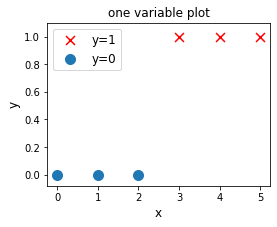

In [3]:
pos = Y_train == 1
neg = Y_train == 0

fig,ax = plt.subplots(1,1,figsize=(4,3))
ax.scatter(X_train[pos], Y_train[pos], marker='x', s=80, c = 'red', label="y=1")
ax.scatter(X_train[neg], Y_train[neg], marker='o', s=100, label="y=0")

ax.set_ylim(-0.08,1.1)
ax.set_ylabel('y', fontsize=12)
ax.set_xlabel('x', fontsize=12)
ax.set_title('one variable plot')
ax.legend(fontsize=12)
plt.show()

In [4]:
model = Sequential(
    [
        tf.keras.layers.Dense(1, input_dim=1,  activation = 'sigmoid', name='L1')
    ]
)

In [6]:
model.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7f20ab818a90>>

# Coffee Roasting Example in TensorFlow

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.datasets import boston_housing
import tensorflow as tf

In [29]:
(train_data, train_labels),(test_data, test_labels) = boston_housing.load_data()


In [31]:
train_data.shape
train_labels[0:3]

array([15.2, 42.3, 50. ])

In [33]:
print(train_data.shape, train_labels.shape)

(404, 13) (404,)


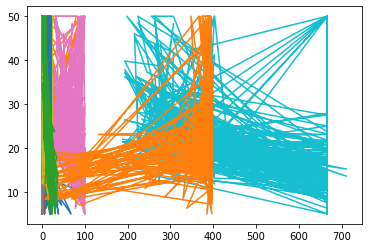

In [35]:
plt.plot(train_data, train_labels)

# Normalizing the data
fitting and learning will be much easier if the data is normalized , it means the features should have similar range

In [100]:
X = train_data

train_labels = train_labels.reshape(-1,1)

print(f"the data beofore normalization:  {np.max(train_data[:,:]):0.2f} {np.min(train_data[:,:]):0.2f} ")
print(f"the labels before normalization: {np.max(train_labels[:,0]):0.2f} {np.min(train_labels[:,0]):0.2f}  ")
# Now lets normalize them 
norm_l = tf.keras.layers.Normalization(axis = -1)
# adapt learns and save the mean and variance of data
norm_l.adapt(train_data)
train_data_n = norm_l(train_data) # by this we mean normalized training data


norm_l1 = tf.keras.layers.Normalization(axis = -1)
norm_l1.adapt(train_labels)
train_labels_n = norm_l1(train_labels)

print(f" the data after normalization , Max, Min: {np.max(train_data_n[:,:]):0.2f}, {np.min(train_data_n[:,:]):0.2f}")
print(f"the labels after normalization Max, Min: {np.max(train_labels_n[:,0]):0.2f}, {np.min(train_labels_n[:,0]):0.2f}")

the data beofore normalization:  711.00 0.00 
the labels before normalization: 50.00 5.00  
 the data after normalization , Max, Min: 9.23, -3.82
the labels after normalization Max, Min: 3.00, -1.89


In [85]:
# print(f"Temperature Max, Min pre normalization: {np.max(X[:,0]):0.2f}, {np.min(X[:,0]):0.2f}")
# print(f"Duration    Max, Min pre normalization: {np.max(X[:,1]):0.2f}, {np.min(X[:,1]):0.2f}")
# norm_l = tf.keras.layers.Normalization(axis=-1)
# norm_l.adapt(X)  # learns mean, variance
# Xn = norm_l(X)
# print(f"Temperature Max, Min post normalization: {np.max(Xn[:,0]):0.2f}, {np.min(Xn[:,0]):0.2f}")
# print(f"Duration    Max, Min post normalization: {np.max(Xn[:,1]):0.2f}, {np.min(Xn[:,1]):0.2f}")

Temperature Max, Min pre normalization: 88.98, 0.01
Duration    Max, Min pre normalization: 100.00, 0.00
Temperature Max, Min post normalization: 9.23, -0.41
Duration    Max, Min post normalization: 3.73, -0.48


Tile/copy our data to increase our training set size

In [102]:
Xt = np.tile(train_data_n,(1000,1))
Yt= np.tile(train_labels_n,(1000,1))   
print(Xt.shape, Yt.shape)   

(404000, 13) (404000, 1)


In [114]:
tf.random.set_seed(1234)  # applied to achieve consistent results
model = Sequential(
    [
        tf.keras.Input(shape=(13,)),
        Dense(13, activation='sigmoid', name = 'layer1'),
        Dense(8, activation='sigmoid', name = 'layer2'),
        Dense(8, activation='sigmoid', name = 'layer3'),
        Dense(8, activation='sigmoid', name = 'layer4'),
        Dense(1, activation='sigmoid', name = 'layer5')
     ]
)

In [123]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 13)                182       
                                                                 
 layer2 (Dense)              (None, 8)                 112       
                                                                 
 layer3 (Dense)              (None, 8)                 72        
                                                                 
 layer4 (Dense)              (None, 8)                 72        
                                                                 
 layer5 (Dense)              (None, 1)                 9         
                                                                 
Total params: 447
Trainable params: 447
Non-trainable params: 0
_________________________________________________________________


The parameter counts shown in the summary correspond to the number of elements in the weight and bias arrays as shown below.

In [122]:
L1_num_params = 13 * 13 + 13   # W1 parameters  + b1 parameters
L2_num_params = 13 * 8 + 8   # W2 parameters  + b2 parameters\
L3_num_params = 8 * 8 + 8
L4_num_params = 8 * 8 + 8 
L5_num_params  = 8 * 1 + 1
print("L1 params = ", L1_num_params, ", L2 params = ", L2_num_params, 'L3_num_params', L3_num_params ,'L4_num_params', L4_num_params , 'L5_num_params',L5_num_params )
total = (L1_num_params+L2_num_params+L3_num_params+L4_num_params+L5_num_params)
print(total)

L1 params =  182 , L2 params =  112 L3_num_params 72 L4_num_params 72 L5_num_params 9
447


#### Let's examine the weights and biases Tensorflow has instantiated.  The weights $W$ should be of size (number of features in input, number of units in the layer) while the bias $b$ size should match the number of units in the layer:
- In the first layer with 13 units, we expect W to have a size of (13,13) and $b$ should have 13 elements.
- In the second layer with 8 unit, we expect W to have a size of (13,8) and $b$ should have 8 element.

In [128]:
W1, b1 = model.get_layer("layer1").get_weights()
W2, b2 = model.get_layer("layer2").get_weights()
W3, b3 = model.get_layer("layer3").get_weights()
W4, b4 = model.get_layer("layer4").get_weights()
W5, b5 = model.get_layer("layer5").get_weights()

print(f"W1{W1.shape}:\n", W1, f"\nb1{b1.shape}:", b1)
print(f"W2{W2.shape}:\n", W2, f"\nb2{b2.shape}:", b2)

print(f"W3{W3.shape}:\n", W3, f"\nb3{b3.shape}:", b3)
print(f"W4{W4.shape}:\n", W4, f"\nb4{b4.shape}:", b4)
print(f"W5{W5.shape}:\n", W5, f"\nb5{b5.shape}:", b5)

W1(13, 13):
 [[ 3.65470052e-02 -1.30070180e-01  7.84276724e-02 -2.46121705e-01
  -6.69313669e-02  3.90255928e-01  6.93747401e-03 -1.35643452e-01
   2.67909825e-01  8.19556117e-02  2.58267403e-01 -1.60861015e-02
   8.39611888e-02]
 [-4.58574831e-01 -6.18204474e-02  4.59477663e-01  4.62197483e-01
  -3.39650035e-01  4.75170255e-01  2.70324409e-01 -2.68890083e-01
  -1.05752647e-02  1.27901375e-01  6.12366796e-02 -9.25543606e-02
  -9.73262489e-02]
 [ 1.75526679e-01  2.63374746e-01 -5.23422062e-02 -4.25765038e-01
  -2.44081080e-01 -1.87047273e-01 -1.75474554e-01 -2.94940770e-01
   3.12400222e-01  8.86974931e-02 -1.20677024e-01  3.29866529e-01
  -2.49391720e-01]
 [ 3.09484124e-01 -3.24269921e-01 -2.23643303e-01 -8.37091208e-02
   8.76265764e-02  1.39109194e-01 -1.76673263e-01  4.73301113e-01
   2.48866141e-01 -8.56932700e-02 -2.84903467e-01 -5.32788336e-02
  -4.57857043e-01]
 [ 4.61395681e-01  3.39665294e-01 -4.33938175e-01  4.54139531e-01
   2.66529322e-01  8.05481076e-02 -1.37335777e-01 -1.

The following statements will be described in detail in Week2. For now:
- The `model.compile` statement defines a loss function and specifies a compile optimization.
- The `model.fit` statement runs gradient descent and fits the weights to the data.

In [131]:
model.compile(
    loss = tf.keras.losses.MeanAbsoluteError(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
)

model.fit(
    Xt,Yt,            
    epochs=10,
)

Epoch 1/10
12625/12625 [==============================] - 22s 2ms/step - loss: 0.5334
Epoch 2/10
12625/12625 [==============================] - 25s 2ms/step - loss: 0.5219
Epoch 3/10
12625/12625 [==============================] - 24s 2ms/step - loss: 0.5168
Epoch 4/10
12625/12625 [==============================] - 22s 2ms/step - loss: 0.5159
Epoch 5/10
12625/12625 [==============================] - 23s 2ms/step - loss: 0.5148
Epoch 6/10
12625/12625 [==============================] - 23s 2ms/step - loss: 0.5138
Epoch 7/10
12625/12625 [==============================] - 22s 2ms/step - loss: 0.5137
Epoch 8/10
12625/12625 [==============================] - 22s 2ms/step - loss: 0.5136
Epoch 9/10
12625/12625 [==============================] - 24s 2ms/step - loss: 0.5134
Epoch 10/10
12625/12625 [==============================] - 22s 2ms/step - loss: 0.5131


In [ ]:
W1, b1 = model.get_layer("layer1").get_weights()
W2, b2 = model.get_layer("layer2").get_weights()
print("W1:\n", W1, "\nb1:", b1)
print("W2:\n", W2, "\nb2:", b2)

In [132]:
W1, b1 = model.get_layer("layer1").get_weights()
W2, b2 = model.get_layer("layer2").get_weights()
W3, b3 = model.get_layer("layer3").get_weights()
W4, b4 = model.get_layer("layer4").get_weights()
W5, b5 = model.get_layer("layer5").get_weights()

print(f"W1{W1.shape}:\n", W1, f"\nb1{b1.shape}:", b1)
print(f"W2{W2.shape}:\n", W2, f"\nb2{b2.shape}:", b2)

print(f"W3{W3.shape}:\n", W3, f"\nb3{b3.shape}:", b3)
print(f"W4{W4.shape}:\n", W4, f"\nb4{b4.shape}:", b4)
print(f"W5{W5.shape}:\n", W5, f"\nb5{b5.shape}:", b5)

W1(13, 13):
 [[-2.8009063e-01 -1.1452181e+00  1.0579045e+00  1.7408226e+00
   5.3127891e-01  6.6992888e+00 -2.6379321e+00  3.1689489e-01
  -4.0201502e+00  8.6444912e+00  6.4489474e+00 -8.7658701e+00
   1.6681755e+00]
 [-7.7583394e+00 -4.4494863e+00  1.2730513e+00 -5.7697244e+00
  -4.6951432e+00 -5.2637750e-01  3.0317171e+00 -2.5181298e+00
  -5.2770536e-02  2.7023702e+00 -6.8364203e-01 -1.7665303e+00
  -3.8885858e+00]
 [-3.8667122e-01 -2.4405921e-01  3.9436154e+00 -6.7141615e-02
  -4.2017922e+00  4.4471061e-01 -5.2793336e-01  5.9678044e+00
  -1.4173430e+00 -3.7673969e+00  5.0024252e+00 -6.5702838e-01
  -1.7361816e+00]
 [-2.2306583e+00 -8.2491779e-01 -8.5876250e-01 -1.2076886e+00
  -6.4569879e-01  3.9220884e-01 -2.8496315e+00 -7.1578473e-01
   1.6620885e+00 -1.8227351e+00 -1.8874985e+00 -9.4868124e-01
   5.7447308e-01]
 [ 1.0022798e+01  9.5102615e+00 -1.7564863e-01  7.4389052e+00
   5.4319353e+00 -1.1248012e+00 -5.3452367e-01  8.5367453e-01
  -5.2023187e+00  1.2467035e+00  3.3681783e-01 

ValueError: ignored

InvalidArgumentError: ignored